In [1]:
import pandas as pd
df = pd.read_csv('../transaction_data_version3.csv')
product_df = pd.read_csv('../product.csv')
product_df1 = product_df[['PRODUCT_ID','SUB_COMMODITY_DESC']]
df_merge = df.merge(product_df1,on='PRODUCT_ID')
df_merge.groupby('SUB_COMMODITY_DESC')['QUANTITY'].sum().sort_values()
df_milk = df_merge.query('SUB_COMMODITY_DESC == "FLUID MILK WHITE ONLY"')
df_milk_1 = df_milk[['DATE','QUANTITY']]
df_milk_1 = df_milk_1.groupby('DATE')['QUANTITY'].sum().reset_index()

In [2]:
df_milk_1

,DATE,QUANTITY
0,2019-07-30,2
1,2019-07-31,6
2,2019-08-01,13
3,2019-08-02,13
4,2019-08-03,8
...,...,...
704,2021-07-05,94
705,2021-07-06,104
706,2021-07-07,107
707,2021-07-08,108


In [3]:
# transfer Datetime column to datetime format
df_milk_1.DATE = pd.to_datetime(df_milk_1.DATE, 
                             format='%Y-%m-%d')
#use Datetime as filter to split dataset
train = df_milk_1[df_milk_1['DATE'] <= '2021-06-01']
test = df_milk_1[df_milk_1['DATE'] > '2021-06-01']

In [4]:
train = train.set_index('DATE')
test = test.set_index('DATE')
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

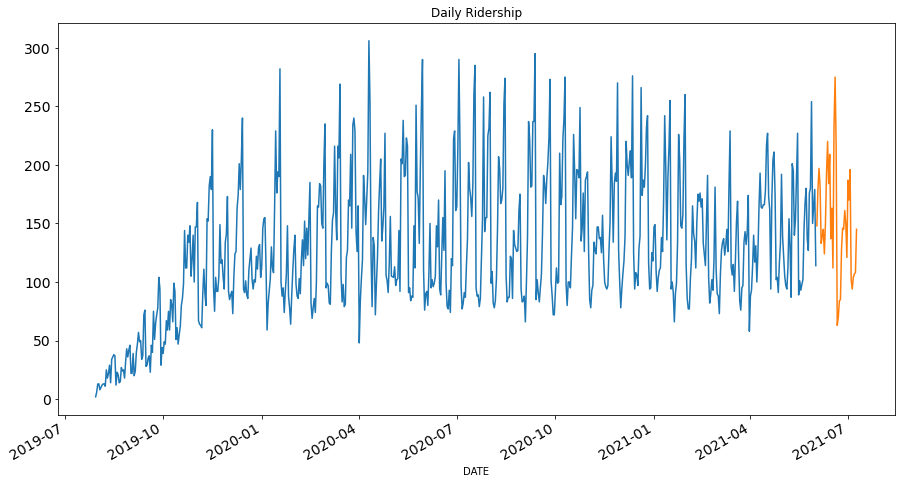

In [5]:
import matplotlib.pyplot as plt

#Plotting data
train.QUANTITY.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.QUANTITY.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

### 指数平滑是单变量数据的时间序列预测方法。
- 指数平滑预测方法的类似之处在于预测是过去观察的加权和，但模型明确地使用指数减小的权重用于过去的观察。
- 具体而言，过去的观察以几何减小的比率加权。

### 指数平滑时间序列预测方法有三种主要类型。
- 一种假设没有系统结构的简单方法，明确处理趋势的扩展，以及增加季节性支持的最先进方法。
- 单指数平滑 : 简称 SES，也称为简单指数平滑，是一种没有趋势或季节性的单变量数据的时间序列预测方法。
- 双指数平滑 : 是指数平滑的扩展，明确增加了对单变量时间序列趋势的支持。
- 三次指数平滑 : 是指数平滑的扩展，明确地增加了对单变量时间序列的季节性支持。

### 三次指数平滑
- 可以使用 ExponentialSmoothing Statsmodels 类在 Python 中实现单指数，双指数和三指数平滑。
指定配置参数：
- trend：趋势分量的类型，作为加法的"add"或乘法的"mul"。可以通过将趋势设置为"None"来禁用对趋势建模。
- damped_trend：是否应该抑制趋势分量，True或False。
- seasonal：季节性成分的类型，为"add"为添加剂或"mul"为乘法。可以通过将季节性组件设置为"None"来禁用它。
- 累加模型適用有線性趨勢且季節性不隨時間變化序列，累乘模型有線性趨勢且季節性隨時間變化序列情境
- seasonal_periods ：季节性时间段内的时间步数，例如每年季节性结构 12 个月 12 个月。
 - quarterly data 設4
 - weekly data 設 7

- https://github.com/apachecn/ml-mastery-zh/blob/master/docs/ts-intro/exponential-smoothing-for-time-series-forecasting-in-python.md
- https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html
- https://medium.com/%E5%AE%85%E7%94%B7%E9%9B%9C%E5%AD%B8%E7%AD%86%E8%A8%98/data-science-%E6%99%82%E9%96%93%E5%BA%8F%E5%88%97%E5%88%86%E6%9E%90%E5%88%9D%E6%8E%A2-3-73d6fbfea487

C:\ProgramData\Anaconda3\envs\time_analyse\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


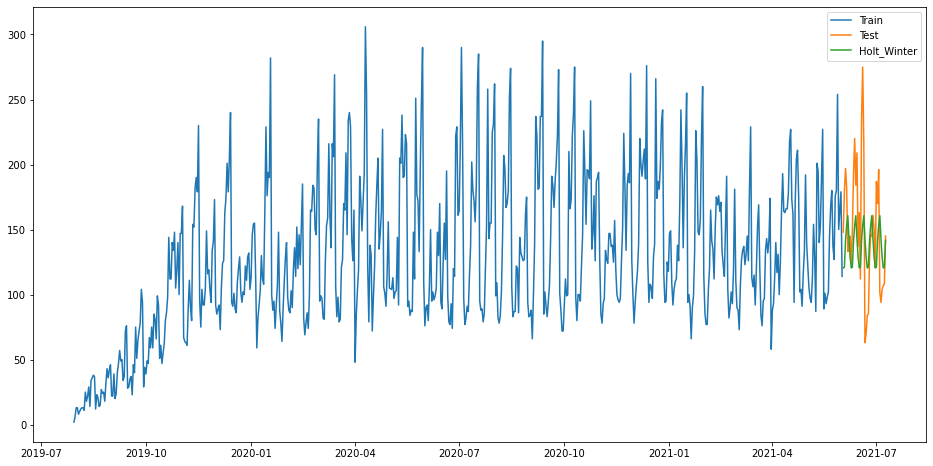

In [8]:
from statsmodels.tsa.api import ExponentialSmoothing
import numpy as np

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['QUANTITY']), 
                            seasonal_periods=7, 
                            damped_trend = True,
                            trend='add', 
                            seasonal = "add"
                           ).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['QUANTITY'], label='Train')
plt.plot(test['QUANTITY'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [9]:
from math import sqrt
from sklearn import metrics
MSE = metrics.mean_squared_error(test.QUANTITY, y_hat_avg.Holt_Winter)
print(MSE)

2042.898580990537
